# <font size="12">EEE4490 Lab3</font>
# Class: EG114403 / 2B

# Student Name 1: CHAN Tai Man

# Student number 1: 12345678

# Student Name 2: LEE Tai Man

# Student number 2: 87654321

In [1]:
import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

##  2.1 Object Detection

### Image

Inference time: 361.47 ms


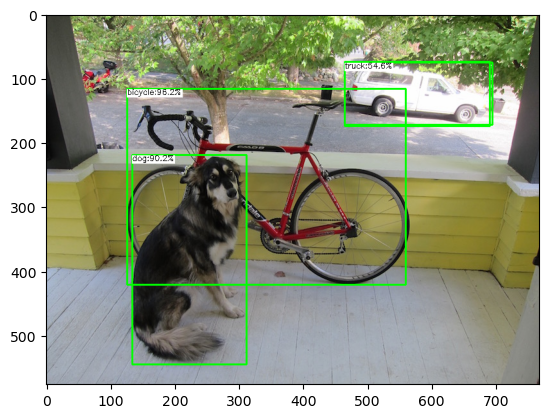

In [2]:
import os
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('2_1_Object_Detection')
from yolox import YoloX

# Valid combinations of backends and targets
backend_target_pairs = [
    [cv.dnn.DNN_BACKEND_OPENCV, cv.dnn.DNN_TARGET_CPU],
    [cv.dnn.DNN_BACKEND_CUDA,   cv.dnn.DNN_TARGET_CUDA],
    [cv.dnn.DNN_BACKEND_CUDA,   cv.dnn.DNN_TARGET_CUDA_FP16],
    [cv.dnn.DNN_BACKEND_TIMVX,  cv.dnn.DNN_TARGET_NPU],
    [cv.dnn.DNN_BACKEND_CANN,   cv.dnn.DNN_TARGET_NPU]
]

classes = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
           'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
           'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
           'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
           'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
           'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
           'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
           'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
           'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
           'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
           'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
           'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
           'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
           'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')

def letterbox(srcimg, target_size=(640, 640)):
    padded_img = np.ones((target_size[0], target_size[1], 3)).astype(np.float32) * 114.0
    ratio = min(target_size[0] / srcimg.shape[0], target_size[1] / srcimg.shape[1])
    resized_img = cv.resize(
        srcimg, (int(srcimg.shape[1] * ratio), int(srcimg.shape[0] * ratio)), interpolation=cv.INTER_LINEAR
    ).astype(np.float32)
    padded_img[: int(srcimg.shape[0] * ratio), : int(srcimg.shape[1] * ratio)] = resized_img

    return padded_img, ratio

def unletterbox(bbox, letterbox_scale):
    return bbox / letterbox_scale

def vis(dets, srcimg, letterbox_scale, fps=None):
    res_img = srcimg.copy()

    if fps is not None:
        fps_label = "FPS: %.2f" % fps
        cv.putText(res_img, fps_label, (10, 25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    for det in dets:
        box = unletterbox(det[:4], letterbox_scale).astype(np.int32)
        score = det[-2]
        cls_id = int(det[-1])

        x0, y0, x1, y1 = box

        text = '{}:{:.1f}%'.format(classes[cls_id], score * 100)
        font = cv.FONT_HERSHEY_SIMPLEX
        txt_size = cv.getTextSize(text, font, 0.4, 1)[0]
        cv.rectangle(res_img, (x0, y0), (x1, y1), (0, 255, 0), 2)
        cv.rectangle(res_img, (x0, y0 + 1), (x0 + txt_size[0] + 1, y0 + int(1.5 * txt_size[1])), (255, 255, 255), -1)
        cv.putText(res_img, text, (x0, y0 + txt_size[1]), font, 0.4, (0, 0, 0), thickness=1)

    return res_img



model = '2_1_Object_Detection/object_detection_yolox_2022nov.onnx'
confidence = 0.5
nms = 0.5
obj = 0.5
backend_id = backend_target_pairs[0][0]
target_id = backend_target_pairs[0][1]


model_net = YoloX(modelPath= model,
                  confThreshold=confidence,
                  nmsThreshold=nms,
                  objThreshold=obj,
                  backendId=backend_id,
                  targetId=target_id)


tm = cv.TickMeter()
tm.reset()

source = "testing_image.jpg"

image = cv.imread(source)
input_blob = cv.cvtColor(image, cv.COLOR_BGR2RGB)
input_blob, letterbox_scale = letterbox(input_blob)

# Inference
tm.start()
preds = model_net.infer(input_blob)
tm.stop()
print("Inference time: {:.2f} ms".format(tm.getTimeMilli()))

img = vis(preds, image, letterbox_scale)

plt.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))

### USB Camera

Press any key to stop video capture


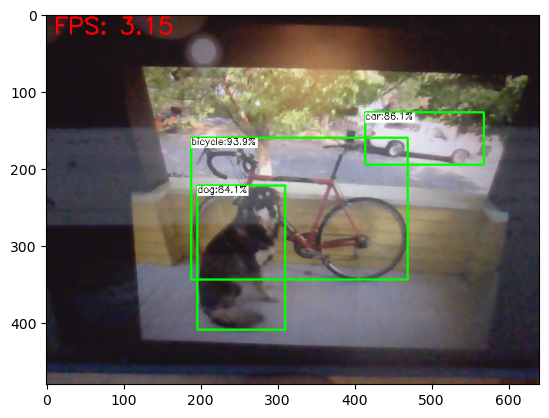

In [6]:
sys.path.append('2_1_Object_Detection')
from yolox import YoloX

# Valid combinations of backends and targets
backend_target_pairs = [
    [cv.dnn.DNN_BACKEND_OPENCV, cv.dnn.DNN_TARGET_CPU],
    [cv.dnn.DNN_BACKEND_CUDA,   cv.dnn.DNN_TARGET_CUDA],
    [cv.dnn.DNN_BACKEND_CUDA,   cv.dnn.DNN_TARGET_CUDA_FP16],
    [cv.dnn.DNN_BACKEND_TIMVX,  cv.dnn.DNN_TARGET_NPU],
    [cv.dnn.DNN_BACKEND_CANN,   cv.dnn.DNN_TARGET_NPU]
]

classes = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
           'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
           'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
           'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
           'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
           'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
           'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
           'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
           'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
           'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
           'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
           'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
           'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
           'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')

def letterbox(srcimg, target_size=(640, 640)):
    padded_img = np.ones((target_size[0], target_size[1], 3)).astype(np.float32) * 114.0
    ratio = min(target_size[0] / srcimg.shape[0], target_size[1] / srcimg.shape[1])
    resized_img = cv.resize(
        srcimg, (int(srcimg.shape[1] * ratio), int(srcimg.shape[0] * ratio)), interpolation=cv.INTER_LINEAR
    ).astype(np.float32)
    padded_img[: int(srcimg.shape[0] * ratio), : int(srcimg.shape[1] * ratio)] = resized_img

    return padded_img, ratio

def unletterbox(bbox, letterbox_scale):
    return bbox / letterbox_scale

def vis(dets, srcimg, letterbox_scale, fps=None):
    res_img = srcimg.copy()

    if fps is not None:
        fps_label = "FPS: %.2f" % fps
        cv.putText(res_img, fps_label, (10, 25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    for det in dets:
        box = unletterbox(det[:4], letterbox_scale).astype(np.int32)
        score = det[-2]
        cls_id = int(det[-1])

        x0, y0, x1, y1 = box

        text = '{}:{:.1f}%'.format(classes[cls_id], score * 100)
        font = cv.FONT_HERSHEY_SIMPLEX
        txt_size = cv.getTextSize(text, font, 0.4, 1)[0]
        cv.rectangle(res_img, (x0, y0), (x1, y1), (0, 255, 0), 2)
        cv.rectangle(res_img, (x0, y0 + 1), (x0 + txt_size[0] + 1, y0 + int(1.5 * txt_size[1])), (255, 255, 255), -1)
        cv.putText(res_img, text, (x0, y0 + txt_size[1]), font, 0.4, (0, 0, 0), thickness=1)

    return res_img



model = '2_1_Object_Detection/object_detection_yolox_2022nov.onnx'
confidence = 0.5
nms = 0.5
obj = 0.5
backend_id = backend_target_pairs[0][0]
target_id = backend_target_pairs[0][1]


model_net = YoloX(modelPath= model,
                  confThreshold=confidence,
                  nmsThreshold=nms,
                  objThreshold=obj,
                  backendId=backend_id,
                  targetId=target_id)


tm = cv.TickMeter()
tm.reset()

print("Press any key to stop video capture")
deviceId = 0
cap = cv.VideoCapture(deviceId)

while cv.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        print('No frames grabbed!')
        break

    input_blob = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    input_blob, letterbox_scale = letterbox(input_blob)

    # Inference
    tm.start()
    preds = model_net.infer(input_blob)
    tm.stop()

    img = vis(preds, frame, letterbox_scale, fps=tm.getFPS())

    cv.imshow("YoloX Demo", img)

    tm.reset()
plt.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))   
cap.release()
cv.destroyAllWindows()

## 2.2. Face Detection (4 marks)

### Input: Image

### Input: UBS Camera

<img src='Figure.png'>

##  2.3. Person Detection (4 marks)

### Input: Image

### Input: UBS Camera

<img src='Figure 2.png'>

## 2.4. Text Detection (4 marks)


### Input: Image

### Input: UBS Camera

<img src='Figure 3.png'>

##  3.1. Face Recognition (4 marks)

### ### Input: A pair of Images

## 3.2. Face Expression Recognition (6 marks)

### Input: Image

### Input: UBS Camera

##  3.3. Hand Pose Estimation (6 marks)

### Input: Image

### Input: UBS Camera

##  3.4. Human Pose Estimation (6 marks)

### Input: Image

### Input: UBS Camera

##  3.5. Text Recognition (6 marks)

### Input: Image

### Input: UBS Camera